# Analyse des données

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier

## Données profile
Le fichier profile contient plusieurs conditions cibles on ne recupére ici que les conditions valves.

In [6]:
#Lecture des données cibles (Valve condition)
df_v = pd.read_table("data/profile.txt",sep="\t", usecols=[1], names=['valve_condition'])
df_v.head()
df_v.tail(10)

,valve_condition
2195,100
2196,100
2197,100
2198,100
2199,100
2200,100
2201,100
2202,100
2203,100
2204,100


In [7]:
len(df_v)
df_v.value_counts()

valve_condition
100                1125
73                  360
80                  360
90                  360
Name: count, dtype: int64

In [8]:
#Fonction de conversion de condition valve en status optimal (1) ou non (0)
def is_optimal(x):
    if x==100:
        return 1
    else:
        return 0   

In [9]:
df_v["optimal"] = df_v["valve_condition"].map(is_optimal)
df_v["optimal"].value_counts()

# La repartition entre conditions optimales et non optimales a l'air assez équilibrée ce qui est surprenant mais un bon signe pour l'entrainement d'un modèele de classification par la suite.

optimal
1    1125
0    1080
Name: count, dtype: int64

In [10]:
df_v["optimal"].sample(5)

170     1
27      1
2075    0
665     0
461     1
Name: optimal, dtype: int64

## Données fs1 (volume flow)

On recupere les données en dataframe pour une meilleure analyse

In [13]:
n_vars = 600
col_names  = [f"fs_{i}" for i in range (n_vars)] #nom des colonnes
df_fs = pd.read_table("data/FS1.txt",sep="\t", names=col_names)
df_fs.head()
#len(df_fs)
#df_fs.shape

,fs_0,fs_1,fs_2,fs_3,fs_4,fs_5,fs_6,fs_7,fs_8,fs_9,...,fs_590,fs_591,fs_592,fs_593,fs_594,fs_595,fs_596,fs_597,fs_598,fs_599
0,8.990,0.770,0.641,0.006,0.000,0.000,0.001,0.003,0.001,0.001,...,7.743,7.992,7.919,7.773,7.955,7.823,7.963,7.876,7.738,8.036
1,8.919,0.815,0.709,0.009,0.004,0.000,0.001,0.000,0.000,0.001,...,7.831,8.003,7.923,7.745,7.867,7.747,7.969,7.969,7.963,7.890
2,9.179,0.683,0.528,0.008,0.003,0.001,0.003,0.003,0.004,0.006,...,7.862,7.815,7.894,7.743,7.936,7.770,7.982,7.873,7.898,7.952
3,9.034,0.728,0.595,0.009,0.001,0.004,0.003,0.003,0.003,0.001,...,7.631,7.949,7.773,8.054,7.827,8.011,7.919,7.938,7.877,7.773
4,8.729,0.705,0.446,0.014,0.007,0.003,0.001,0.003,0.001,0.000,...,7.771,7.936,7.919,7.946,7.804,7.983,7.838,7.882,7.894,7.825


In [14]:
df_fs.describe()

,fs_0,fs_1,fs_2,fs_3,fs_4,fs_5,fs_6,fs_7,fs_8,fs_9,...,fs_590,fs_591,fs_592,fs_593,fs_594,fs_595,fs_596,fs_597,fs_598,fs_599
count,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,...,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000
mean,8.287100,0.857298,0.563584,0.031154,0.003567,0.002926,0.002683,0.002458,0.002436,0.002311,...,7.638567,7.638928,7.642123,7.641907,7.638804,7.643067,7.637415,7.645035,7.638999,7.637983
std,0.480969,0.125100,0.152903,0.039403,0.002810,0.002540,0.002501,0.002410,0.002451,0.002378,...,0.530204,0.529731,0.530209,0.530325,0.529648,0.530317,0.529648,0.530884,0.530817,0.529553
min,7.033000,0.522000,0.309000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.106000,1.117000,1.119000,1.123000,1.109000,1.111000,1.118000,1.120000,1.124000,1.120000
25%,7.961000,0.773000,0.445000,0.009000,0.001000,0.001000,0.000000,0.000000,0.000000,0.000000,...,7.514000,7.515000,7.518000,7.515000,7.519000,7.518000,7.513000,7.525000,7.510000,7.519000
50%,8.278000,0.855000,0.531000,0.016000,0.003000,0.003000,0.003000,0.001000,0.001000,0.001000,...,7.712000,7.709000,7.711000,7.714000,7.706000,7.714000,7.707000,7.713000,7.710000,7.708000
75%,8.610000,0.944000,0.656000,0.036000,0.005000,0.004000,0.004000,0.004000,0.004000,0.004000,...,7.815000,7.815000,7.818000,7.823000,7.813000,7.820000,7.813000,7.821000,7.826000,7.815000
max,11.754000,1.488000,0.985000,0.298000,0.015000,0.013000,0.011000,0.011000,0.012000,0.012000,...,8.060000,8.078000,8.072000,8.064000,8.073000,8.080000,8.076000,8.083000,8.078000,8.087000


<Axes: >

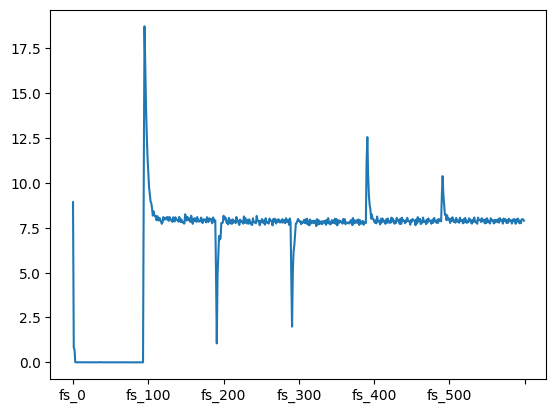

In [15]:
#Affichage d'un cycle
idx=1
row = df_fs.iloc[idx]
row.plot()

## Données ps2 (pression)

On recupere les données en dataframe pour une meilleure analyse

In [16]:
#Lecture ps2 (pression)
n_vars = 6000
col_names  = [f"ps_{i}" for i in range (n_vars)] #nom des colonnes
df_ps = pd.read_table("data/PS2.txt",sep="\t", names=col_names)
df_ps.head()



,ps_0,ps_1,ps_2,ps_3,ps_4,ps_5,ps_6,ps_7,ps_8,ps_9,...,ps_5990,ps_5991,ps_5992,ps_5993,ps_5994,ps_5995,ps_5996,ps_5997,ps_5998,ps_5999
0,125.50,125.39,125.40,125.03,124.05,123.18,104.01,56.500,23.992,18.406,...,125.02,125.00,125.10,125.09,124.98,124.91,124.98,125.11,125.14,125.10
1,125.06,125.08,125.09,124.69,123.84,123.14,103.63,63.687,28.359,21.711,...,124.80,124.88,125.13,125.22,125.09,124.98,125.06,125.13,125.09,125.04
2,125.13,125.27,125.23,124.74,123.94,123.23,106.35,60.516,26.258,19.258,...,124.61,124.69,124.74,124.71,124.59,124.64,124.74,124.73,124.77,124.88
3,124.93,124.96,124.92,124.41,123.60,122.88,103.99,58.859,27.781,21.469,...,124.82,124.79,124.69,124.69,124.77,124.83,124.69,124.53,124.51,124.59
4,124.72,124.74,124.66,124.31,123.57,122.74,105.94,62.648,30.875,23.883,...,124.80,124.67,124.49,124.56,124.69,124.62,124.45,124.41,124.47,124.51


<Axes: >

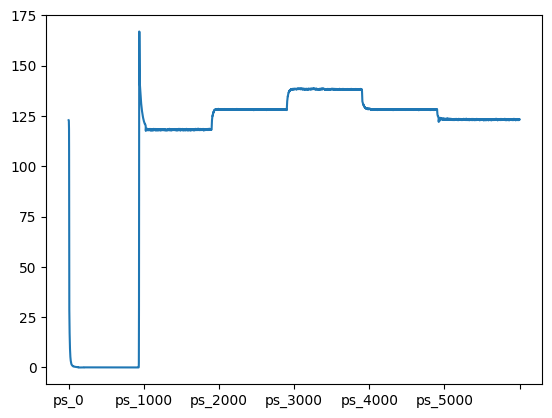

In [17]:
#Affiche d'1 cycle
idx=1024
row = df_ps.iloc[idx]
row.plot()

In [38]:
df_ps.shape

(2205, 6000)